In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle


In [2]:
#Read In Desired DataSet
data = pd.read_csv('/Users/nay/Desktop/Development/Data_Analyst/Indeed_Salary_By_Location/Saved_Searches_CSV/Creative%20Director_in_New%20York%20City_Los%20Angeles_Miami.csv')


In [3]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        175 non-null    object 
 1   input Position  175 non-null    object 
 2   company         175 non-null    object 
 3   location        175 non-null    object 
 4   input City      175 non-null    object 
 5   salary          175 non-null    float64
dtypes: float64(1), object(5)
memory usage: 8.3+ KB


In [4]:
#Displaying Data Frame

display(data)

,position,input Position,company,location,input City,salary
0,"Associate Director, Social Creative, GQ Sports",Creative Director,Conde Nast,"New York, NY\n+2 locations",New York City,80.00
1,Creative Director,Creative Director,Havas Group,"New York, NY\n+1 location",New York City,96.65
2,Creative Director,Creative Director,Razorfish,"New York, NY 10014 \n(SoHo area)\n+1 location",New York City,114.50
3,"Creative Director, Marketing",Creative Director,Paramount+,"Remote in New York, NY 10036\n+1 location",New York City,96.70
4,"Director, Global Creative Packaging, MAC",Creative Director,The Estée Lauder Companies,"New York, NY\n+1 location",New York City,114.00
...,...,...,...,...,...,...
170,Experience Design Director,Creative Director,Razorfish,"Miami, FL 33133 \n(North-East Coconut Grove ar...",Miami,83.30
171,"Director, Experience Design",Creative Director,Magic Leap - Multiple Locations,"Remote in Fort Lauderdale, FL",Miami,157.00
172,Associate Creative Director - Design - Deloitt...,Creative Director,Deloitte,"Miami, FL 33131 \n(Downtown area)\n+2 locations",Miami,131.50
173,"Associate Director, Instructional Design & Dev...",Creative Director,KPMG,"Miami, FL\n+1 location",Miami,101.90


In [5]:
#Check If There Are Any Special Characters In The Data Set
data.isin(['$']).sum(axis=0)

position          0
input Position    0
company           0
location          0
input City        0
salary            0
dtype: int64

In [6]:
#Avoid Noisy Features By Checking The Unique Values For Each Column

for c in data.columns: #looping through dataset
    print("---- %s ---" % c) #printing current column name
    print(data[c].value_counts()) #Using .value_counts() function which returns the count of unique values

---- position ---
Creative Director                                                  56
Associate Creative Director                                        12
Associate Creative Director (Freelance) - Remote                    6
Metaverse Creative Director                                         5
Executive Creative Director                                         4
Associate Director, Social Creative, GQ Sports                      3
Associate Creative Director, Refinery29                             3
Creative Director (Remote)                                          3
Director, Creative Advertising                                      3
Director, eCommerce Creative – Def Jam                              3
Director, Creative Marketing                                        3
Senior Director, Creative Sync                                      3
Brand Creative Director                                             3
Associate Creative Director, Social Creative (Freeform)             3
Cr

In [7]:
#Find Min and Max To Categorize Data
data['salary'].min()

55.1

In [8]:
#Find Max
data['salary'].max()

211.458

In [9]:
data['salary'].value_counts().sort_values(ascending=False)

118.0000    8
114.0000    6
133.0000    6
152.0000    6
114.5000    6
211.4580    5
125.5000    5
120.0000    5
101.9000    4
132.5000    4
119.0000    4
94.1500     3
126.5000    3
128.0000    3
113.5000    3
94.9500     3
96.7000     3
159.5000    3
115.5000    3
134.0000    3
173.7400    3
173.5000    3
100.3000    3
143.5000    3
180.0000    3
156.5000    3
110.1500    3
110.8500    3
80.0000     3
105.5000    3
185.0000    3
93.0000     3
96.6500     3
124.5000    3
92.3500     3
190.5000    3
122.0000    3
101.1000    3
57.5000     2
138.0000    2
75.6835     2
121.5000    2
85.7935     2
101.8500    2
86.7000     2
104.5000    2
133.5000    2
89.3000     2
157.0000    2
131.5000    2
55.1000     2
140.0000    2
83.3000     2
73.1000     2
93.1420     2
136.0000    1
Name: salary, dtype: int64

In [10]:
#Setting Salary To Quantitative Feautures Based On Range
data.loc[(data['salary'] >= 50.0) & (data['salary'] <= 59.99), 'salary'] = 55
data.loc[(data['salary'] >= 60.0) & (data['salary'] <= 69.99), 'salary'] = 65
data.loc[(data['salary'] >= 70.0) & (data['salary'] <= 79.99), 'salary'] = 75
data.loc[(data['salary'] >= 80.0) & (data['salary'] <= 89.99), 'salary'] = 85
data.loc[(data['salary'] >= 90.0) & (data['salary'] <= 99.99), 'salary'] = 95
data.loc[(data['salary'] >= 100.0) & (data['salary'] <= 109.99), 'salary'] = 105
data.loc[(data['salary'] >= 110.0) & (data['salary'] <= 119.99), 'salary'] = 115
data.loc[(data['salary'] >= 120.0) & (data['salary'] <= 129.99), 'salary'] = 125
data.loc[(data['salary'] >= 130.0) & (data['salary'] <= 139.99), 'salary'] = 135
data.loc[(data['salary'] >= 140.0) & (data['salary'] <= 149.99), 'salary'] = 145
data.loc[(data['salary'] >= 150.0) & (data['salary'] <= 159.99), 'salary'] = 155
data.loc[(data['salary'] >= 160.0) & (data['salary'] <= 169.99), 'salary'] = 165
data.loc[(data['salary'] >= 170.0) & (data['salary'] <= 179.99), 'salary'] = 175
data.loc[(data['salary'] >= 180.0) & (data['salary'] <= 189.99), 'salary'] = 185
data.loc[(data['salary'] >= 190.0) & (data['salary'] <= 199.99), 'salary'] = 195
data.loc[(data['salary'] >= 200.0), 'salary'] = 200

In [11]:
#Checking If Salary Variables Where Updated
data['salary'].value_counts()

115.0    36
125.0    24
95.0     20
135.0    20
105.0    17
155.0    14
85.0     11
175.0     6
185.0     6
200.0     5
145.0     5
75.0      4
55.0      4
195.0     3
Name: salary, dtype: int64

In [12]:
#Checking Our Input Cities
data['input City'].value_counts()

New York City    74
Los Angeles      68
Miami            33
Name: input City, dtype: int64

In [13]:
#Setting input City To Quantitative Value
data.loc[(data['input City'] == 'Los Angeles'), 'input City'] = 0
data.loc[(data['input City'] == 'New York City'), 'input City'] = 1
data.loc[(data['input City'] == 'Miami'), 'input City'] = 2

#Checking New Input Cities Data
data['input City'].value_counts()

1    74
0    68
2    33
Name: input City, dtype: int64

In [14]:
#Only Using Necessary Data From Table - Salary and Input City
data = data[["input City", "salary"]]

display(data)

,input City,salary
0,1,85.0
1,1,95.0
2,1,115.0
3,1,95.0
4,1,115.0
...,...,...
170,2,85.0
171,2,155.0
172,2,135.0
173,2,105.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input City  175 non-null    object 
 1   salary      175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [16]:
#Converting Salary Column To Int
display(data.dtypes)

data['salary'] = data['salary'].astype(int)

display(data.dtypes)


input City     object
salary        float64
dtype: object

input City    object
salary         int64
dtype: object

In [17]:
#Converting Input City Column To Int
display(data.dtypes)

data['input City'] = data['input City'].astype(int)

display(data.dtypes)

input City    object
salary         int64
dtype: object

input City    int64
salary        int64
dtype: object

In [18]:
#Renaming Input City So It Has No Spaces
data.rename(columns= {'input City':'city'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city    175 non-null    int64
 1   salary  175 non-null    int64
dtypes: int64(2)
memory usage: 2.9 KB


In [19]:
#Define What We Want To Predict
#We Want To Predict 'salary' Which Stands For Salary In K($1,000) Denominations

predict = "salary"

In [20]:
#Set Up an Array Of Attritubes/Features - Independent Variables
X = np.array(data.drop([predict], 1)) #Returns Dataframe that doesn't have salary In It

#Y is Labels = What We're Predicting - The Dependent Variable - The salary
y = np.array(data[predict])

/var/folders/vb/m3xyby050z56qdndd3_x554h0000gn/T/ipykernel_12394/3578700569.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1)) #Returns Dataframe that doesn't have salary In It


In [28]:
#Splitting Cleaned Data into 4 Specific Arrays For Testing And Training Outside Of For Loop If Model Isnt Created
#x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [21]:
#Create A For Loop That Trains Model Continuously Until It Reaches A Certain Score Then Saves It 

#Best Score Variable
best = 0

for acc in range(100):
    #Splitting Cleaned Data into 4 Specific Arrays For Testing And Training
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    #Create Training Model
    linear = linear_model.LinearRegression()

    #Fit Model To Training Data
    linear.fit(x_train, y_train)

    #Get Accuracy Of Model
    accuracy = linear.score(x_test, y_test)
    print("Accuracy Of New Model: " + str(accuracy), "Accuracy Of Current Best: " + str(best))


    #Only Save Model If New Model Is Better Than Our Current Best
    if accuracy > best:

        best = accuracy

        #Save Model With The Pickle Module
        with open("salaryModel_II.pickle", "wb") as f:
            pickle.dump(linear, f)
            print("saved new model")


    
    

Accuracy Of New Model: 0.0032396589230634376 Accuracy Of Current Best: 0
saved new model
Accuracy Of New Model: -0.01607924320464149 Accuracy Of Current Best: 0.0032396589230634376
Accuracy Of New Model: -0.1371343710573214 Accuracy Of Current Best: 0.0032396589230634376
Accuracy Of New Model: -0.16545249855429822 Accuracy Of Current Best: 0.0032396589230634376
Accuracy Of New Model: 0.23203233792671285 Accuracy Of Current Best: 0.0032396589230634376
saved new model
Accuracy Of New Model: 0.1262130568288996 Accuracy Of Current Best: 0.23203233792671285
Accuracy Of New Model: -0.14104065418909606 Accuracy Of Current Best: 0.23203233792671285
Accuracy Of New Model: -0.48742889654482435 Accuracy Of Current Best: 0.23203233792671285
Accuracy Of New Model: 0.03331810950158953 Accuracy Of Current Best: 0.23203233792671285
Accuracy Of New Model: 0.1554186572891164 Accuracy Of Current Best: 0.23203233792671285
Accuracy Of New Model: 0.049609430723744796 Accuracy Of Current Best: 0.232032337926

In [ ]:
# #Loading Training Model From Previously Created

# #Reading In Model From Pickle File
# pickle_in = open("salaryModel.pickle", "rb")

# #Now Load It Into Linear Model
# linear = pickle.load(pickle_in)

# #Get Accuracy Of Model
# accuracy = linear.score(x_test, y_test)

# print(accuracy)

In [22]:
#How To Use The Model
#Use And Test It On Data

#Show y and b and other coefficients
print("Co: \n", + linear.coef_)
print("Intercept: \n", + linear.intercept_)

Co: 
 [-16.83170515]
Intercept: 
 136.6696269982238


In [23]:
#Use This To Predict On A Real Student
predictions = linear.predict(x_test) #Array of Ys predicted based on trained model and x test input

#Show Predictions, x_test(or input data that wasn't trained on), and actual students grades
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

103.00621669626997 [2] 155
119.83792184724689 [1] 115
136.6696269982238 [0] 125
119.83792184724689 [1] 135
119.83792184724689 [1] 115
119.83792184724689 [1] 155
119.83792184724689 [1] 135
119.83792184724689 [1] 135
119.83792184724689 [1] 155
136.6696269982238 [0] 105
103.00621669626997 [2] 155
136.6696269982238 [0] 95
119.83792184724689 [1] 105
103.00621669626997 [2] 105
119.83792184724689 [1] 95
119.83792184724689 [1] 95
136.6696269982238 [0] 145
136.6696269982238 [0] 125


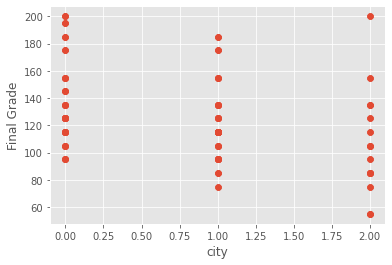

In [24]:
#Lets Plot The Data
style.use('ggplot') #Makes Plot Look Half Decent

#Setup A Scatter Plot
p = "city"
#predict is set to "salary"
pyplot.scatter(data[p], data[predict])
#Label Data
pyplot.xlabel(p)
pyplot.ylabel("Final Grade") #G3 is Final Grade
pyplot.show()